# A) API Zugriff im lokalen Netzwerk 

# A) Das sind die Inhalte:
## Sensor- Werte auslesen und speichern
1. request an das REST API senden und "return-object" analysieren
2. dictionary mit json.loads aus dem "return-object" erzeugen
3. dekodierte Sensor - Messwerte mit "print" ausgeben
4. Messwerte als .json file ablegen
5. Messwerte fortlaufend in einem .db file mitschreiben

# B) Das ist dein Arbeitsauftrag: 
## ->Arbeitsaufgabe 1: "Dummy - Werte speichern"

### Abgabe als Link zu deinem Github repository: 
1. initialisiere ein neues .git repository und lege das "b_nachname_dummy_source" - file darin ab. Der Source-Code soll nur die notwendigen Bestandteile enthalten, um das geforderte .json und .db file anzulegen. Bitte kommentiere den Source-Code und alle individuellen Anpassungen! Füge einen Screenshot des erzeugten JSON - Files und einen Screenshot der geöffneten Tabelle (z.B. in DB - Browser) genau dort ein, wo sie im Source-Code erzeugt werden.
2. speichere die individuell angepassten dummy - Werte in einem .json File "b_nachname_dummywerte.json"
3. speichere die individuell angepassten dummy - Werte in einer sqlite Datenbank "b_nachname_dummywerte.db"
4. füge das .json und .db file deinem git repository hinzu und führe ein commit durch. "-m "Arbeitsaufgabe Teil 1 Nachname"

## ->Arbeitsaufgabe 2: "Sensor - Werte speichern"
Das Abfrageintervall ist eine Minute. Die Dauer der Aufzeichnung ist vor dem Start der Aufzeichnung
individuell mit dem Lehrer zu vereinbaren.

### TODO: *Ersetze die "dummy-Werte" durch echte Sensordaten. Speichere die Werte für Luftfeuchtigkeit, Temperatur und Helligkeit:*
### Abgabe als Link zu deinem Github repository: 
1. initialisiere ein neues .git repository und lege das "source" - file darin ab. Der Source-Code soll im Unterschied zu Arbeitsaufgabe 1 alle Code-Bestandteile von A1) bis A5) in ausgeführter Form beinhalten und zusätzlich die erforderlichen individuellen Anpassungen inkl. deiner Kommentare. Bitte füge einen Screenshot des erzeugten JSON - Files und einen Screenshot der geöffneten Tabelle (z.B. in DB - Browser) genau dort ein, wo sie im Source-Code erzeugt werden.
2. speichere die Sensor - Werte in einem .json File "b_nachname_sensorwerte.json"
3. speichere die Sensor - Werte in einer sqlite Datenbank "b_nachname_sensorwerte.db"
4. füge das .json und .db file deinem git repository hinzu und führe ein commit durch. "-m "Arbeitsaufgabe Teil 2 Nachname"



 

# Input zu Arbeitsaufgabe 1 und 2
### ACHTUNG: Die dummy-Werte für Arbeitsaufgabe 1 müssen individuell z.B. mittels Zufallsgenerator erzeugt werden!
### A1) request an das REST API senden und "return-object" analysieren

In [19]:
import requests
import json
#Die Authentifizierung wird im lokalen Netzwerk noch nicht benötigt, aber im nächsten Schritt
#from requests.auth import HTTPBasicAuth


TODO: 1 Schritt: IP Adresse des Sensors identifizieren! Dazu das Programm "Advanced IP Scanner " installieren
um die IP - Adressen aller Computer im Netzwerk abzufragen. 
Um einen geeigente IP - Range festzulegen, cmd starten - eigene IP Adresse (am Kabel abfragen) und IP - 100 bis IP + 100 scannen. 
Das Gerät ist ein Raspberry Pi und sollte im NW anhand des Namens entsprechend erkannt werden. 

In [3]:
my_url = 'http://192.168.68.112:8080/rest/items/ZWaveNode019WohnzimmerZW100Multisensor6_Sensorrelativehumidity'

In [4]:
hum_value=requests.get(my_url) #erzeugt

NameError: name 'requests' is not defined

In [5]:
type(hum_value)

NameError: name 'hum_value' is not defined

In [6]:
dir(hum_value)

NameError: name 'hum_value' is not defined

In [7]:
hum_value.content

NameError: name 'hum_value' is not defined

In [8]:
my_content=hum_value.content

NameError: name 'hum_value' is not defined

In [ ]:
print(type(my_content))
print(hum_value.encoding)

### A2) dictionary mit json.loads aus dem "return-object" erzeugen

In [ ]:
# json.loads requires the decoded bytestring (which is a string) as argument and returns a python dictionary
# .decode togethe with json.loads is optional
print(type(json.loads(my_content.decode("utf-8"))))
json.loads(my_content.decode("utf-8"))

### A3) dekodierte Sensor - Messwerte mit "print" ausgeben

In [ ]:
# The result - bytestring can be decoded and printed directly as a string without using json.loads , 
# however if you pass it as an argument into the "json-loads" function you can create a dictionary
print(type(my_content.decode()))
print(my_content.decode())

### A4) Input Arbeitsaufgabe 1/ Messwerte als .json file speichern

https://docs.python.org/3/library/json.html
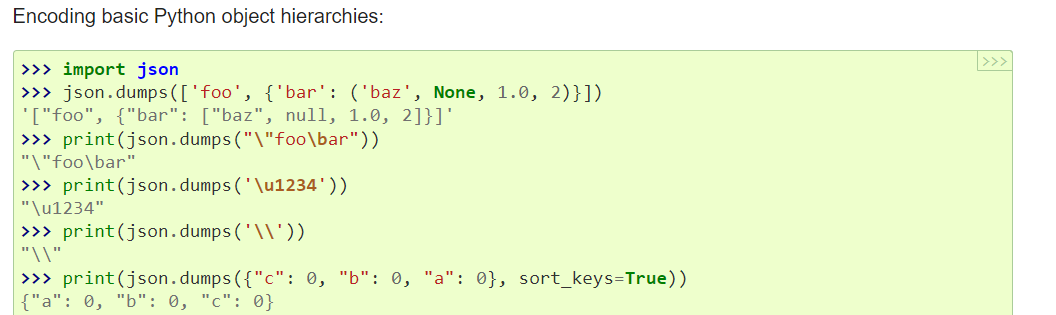

In [12]:
# in order to store the values as a json file, you might create and open a file, 
# continuously get the current sensor readings and finally store them in the json - file
# the code - snippet doesn't meet the requirements of the assignment in terms of time- interval, 
# sensor - readings, etc.

import random
import time
import pandas as pd
my_values_df = pd.DataFrame(data=None,columns=['timestamp','temperature','humidity','brightness'])
my_timestamp = round(time.time())
for my_counter in range(10):
    time.sleep(1)
    my_timestamp = round(time.time())
    print(my_timestamp)
    #hum_value = content_dict['state']
    act_temp = round(random.uniform(-10,40),2)
    act_hum = round(random.uniform(50,80),2)
    act_bright = round(random.uniform(0,65000),2)
    input_values = [my_timestamp,act_temp,act_hum,act_bright]
    my_values_df.loc[my_counter]=input_values

filename = "a_sensor_values"
with open(filename, 'w+') as jsonfile:
    my_values_df.to_json(jsonfile)
    

1683270137
1683270138
1683270139
1683270140
1683270141
1683270142
1683270143
1683270144
1683270145
1683270146


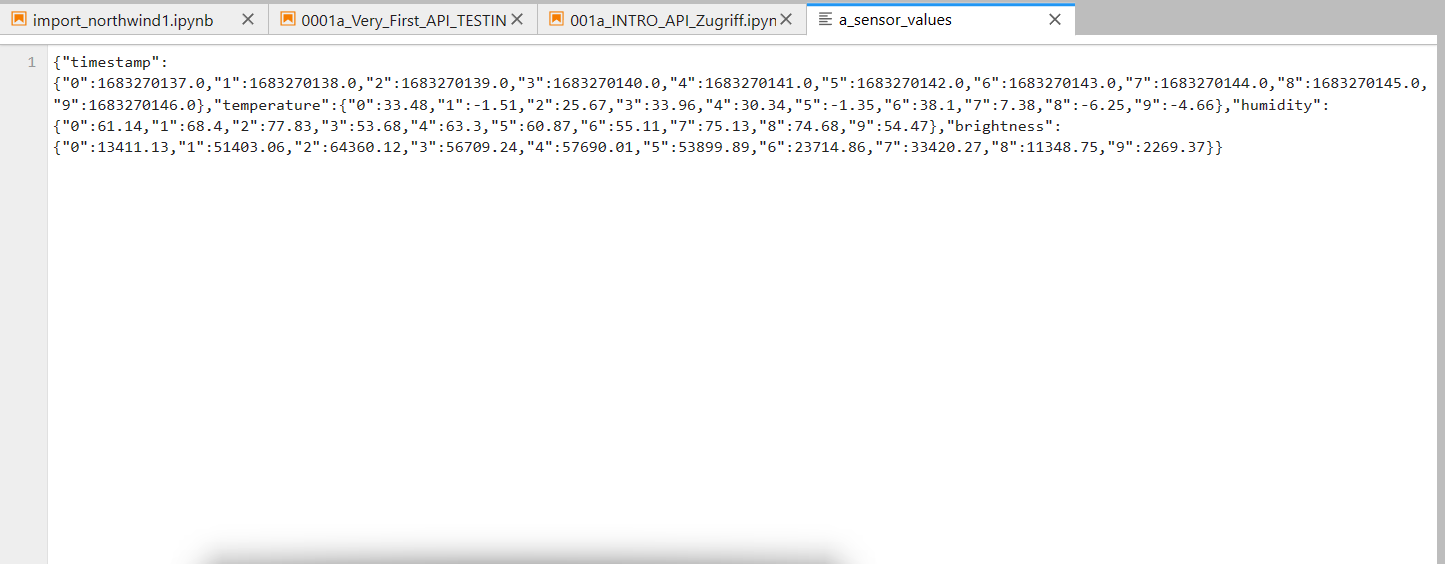

In [ ]:
#retrieve values from .json file via 
pd.read_json(filename)

### A5) Input Arbeitsaufgabe 1/ Messwerte fortlaufend in einem .db file mitschreiben

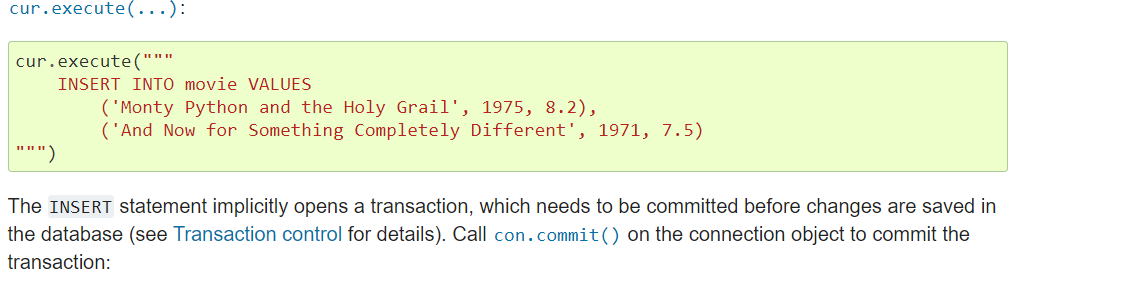

In [13]:
!pip install sqlite3
import sqlite3
import random
import pandas as pd
#cnx = sqlite3.connect(':memory:') alternative in memory database
sqlite_db = 'a_sensor_values.db' # String for creating DB in specified directory
print(sqlite_db)

conn=sqlite3.connect(sqlite_db) # Creates sqlite Database - check in your file explorer
cur=conn.cursor()
cur.execute('''DROP TABLE IF EXISTS sensor_values''')
cur.execute('''CREATE TABLE sensor_values(timestamp NUMERIC,temperature NUMERIC, humidity NUMERIC, brightness NUMERIC);''')

for my_counter in range(10):
    time.sleep(1)
    my_timestamp = round(time.time())
    print(my_timestamp)

    act_temp = round(random.uniform(-10,40),2)
    act_hum = round(random.uniform(50,80),2)
    act_bright = round(random.uniform(0,65000),2) 
# CREATE INSERT STATEMENT
    execution_string = f"INSERT INTO sensor_values VALUES ({my_timestamp}, {act_temp}, {act_hum}, {act_bright})"
    print(execution_string)
    cur.execute(execution_string)
    conn.commit()

ERROR: Could not find a version that satisfies the requirement sqlite3
ERROR: No matching distribution found for sqlite3


a_sensor_values.db
1683270273
INSERT INTO sensor_values VALUES (1683270273, -2.71, 63.54, 48997.81)
1683270274
INSERT INTO sensor_values VALUES (1683270274, 16.48, 76.64, 20147.65)
1683270276
INSERT INTO sensor_values VALUES (1683270276, 26.02, 69.41, 32853.83)
1683270277
INSERT INTO sensor_values VALUES (1683270277, 3.47, 63.1, 19395.42)
1683270278
INSERT INTO sensor_values VALUES (1683270278, 2.5, 59.94, 3661.53)
1683270279
INSERT INTO sensor_values VALUES (1683270279, 20.34, 56.83, 60701.09)
1683270280
INSERT INTO sensor_values VALUES (1683270280, 3.8, 66.15, 23809.2)
1683270281
INSERT INTO sensor_values VALUES (1683270281, 4.0, 59.36, 29355.02)
1683270282
INSERT INTO sensor_values VALUES (1683270282, 5.38, 52.41, 8482.71)
1683270283
INSERT INTO sensor_values VALUES (1683270283, 27.01, 65.09, 59486.66)


In [ ]:
# fetch values directly from db cursor
cur.execute("SELECT * FROM sensor_values")
print(cur.fetchall())

In [ ]:
# retrieve values via pd library from local database
pd.read_sql("SELECT * FROM sensor_values;", conn)